Extraction de Frames Clés (Détection de Changement de Scène)

Pour extraire des frames clés basées sur la détection de changements de scène, nous utilisons le calcul de la différence entre les histogrammes des frames consécutifs :

In [9]:
import cv2
import os
import numpy as np

def extract_key_frames(video_path, output_dir, threshold=0.9):
    """
    Extrait et sauvegarde les frames clés d'une vidéo en utilisant la différence d'histogramme.
    Args:
        video_path (str): Chemin complet du fichier vidéo.
        output_dir (str): Dossier de sortie pour les frames clés.
        threshold (float): Seuil pour la différence d'histogramme indiquant un changement de scène.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)  # Crée le dossier de sortie s'il n'existe pas.

    cap = cv2.VideoCapture(video_path)  # Ouvre la vidéo pour la lecture.
    _, prev_frame = cap.read()  # Lit la première frame.
    prev_hist = cv2.calcHist([prev_frame], [0], None, [256], [0, 256])  # Calcule l'histogramme de la première frame.
    frame_idx = 0

    while True:
        ret, frame = cap.read()  # Lit la frame suivante.
        if not ret:
            break  # Arrête la lecture si la vidéo est terminée ou si une erreur survient.

        hist = cv2.calcHist([frame], [0], None, [256], [0, 256])  # Calcule l'histogramme de la frame actuelle.
        diff = cv2.compareHist(prev_hist, hist, cv2.HISTCMP_CORREL)  # Compare l'histogramme avec celui de la frame précédente.
        
        if diff < threshold:  # Vérifie si la différence est inférieure au seuil pour identifier un changement de scène.
            frame_path = os.path.join(output_dir, f'keyframe_{frame_idx}.jpg')  # Définit le chemin du fichier de sortie pour la frame clé.
            cv2.imwrite(frame_path, frame)  # Sauvegarde la frame clé.
            print(f"Keyframe saved at {frame_path} with diff {diff}")

        prev_hist = hist  # Met à jour l'histogramme précédent pour la comparaison avec la prochaine frame.
        frame_idx += 1  # Incrémente l'index de la frame.

    cap.release()  # Libère la ressource de capture.

def process_subfolders(input_base_dir, output_base_dir, threshold=0.9):
    """
    Traite toutes les vidéos dans les sous-dossiers spécifiés pour extraire les frames clés.
    Args:
        input_base_dir (str): Répertoire de base contenant les sous-dossiers de vidéos.
        output_base_dir (str): Répertoire de base pour les frames clés extraits.
        threshold (float): Seuil pour la détection des changements de scène.
    """
    subfolders = ['Celeb_fake_face_only', 'Celeb_real_face_only']
    labels = ['fake', 'real']  # Étiquettes correspondant aux sous-dossiers.

    for subfolder, label in zip(subfolders, labels):
        input_subdir = os.path.join(input_base_dir, subfolder)
        output_subdir = os.path.join(output_base_dir, f"{subfolder}_frames")

        for video_file in os.listdir(input_subdir):
            if video_file.endswith('.mp4'):
                video_path = os.path.join(input_subdir, video_file)
                extract_key_frames(video_path, output_subdir, threshold)

# Example usage
input_base_dir = '/home/pepuere/Téléchargements/Celeb_face_only'
output_base_dir = '/home/pepuere/Téléchargements/Celeb_face_only_Frames'
process_subfolders(input_base_dir, output_base_dir)


Keyframe saved at /home/pepuere/Téléchargements/Celeb_face_only_Frames/Celeb_fake_face_only_frames/keyframe_12.jpg with diff 0.8641347035809771
Keyframe saved at /home/pepuere/Téléchargements/Celeb_face_only_Frames/Celeb_fake_face_only_frames/keyframe_13.jpg with diff 0.8578611096999751
Keyframe saved at /home/pepuere/Téléchargements/Celeb_face_only_Frames/Celeb_fake_face_only_frames/keyframe_40.jpg with diff 0.876035757325321
Keyframe saved at /home/pepuere/Téléchargements/Celeb_face_only_Frames/Celeb_fake_face_only_frames/keyframe_48.jpg with diff 0.8660287153104788
Keyframe saved at /home/pepuere/Téléchargements/Celeb_face_only_Frames/Celeb_fake_face_only_frames/keyframe_49.jpg with diff 0.8894913647462352
Keyframe saved at /home/pepuere/Téléchargements/Celeb_face_only_Frames/Celeb_fake_face_only_frames/keyframe_135.jpg with diff 0.875440807782486
Keyframe saved at /home/pepuere/Téléchargements/Celeb_face_only_Frames/Celeb_fake_face_only_frames/keyframe_139.jpg with diff 0.867028803

Pour ajuster les paramètres de calcul des histogrammes afin d'inclure plusieurs canaux de couleur (plutôt qu'un seul canal)

In [10]:
import cv2
import os
import numpy as np

def extract_key_frames(video_path, output_dir, threshold=0.9):
    """
    Extrait et sauvegarde les frames clés d'une vidéo en utilisant la différence d'histogramme.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    cap = cv2.VideoCapture(video_path)
    _, prev_frame = cap.read()
    prev_hist = cv2.calcHist([prev_frame], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])  # Utilisation de moins de bins pour simplifier
    frame_idx = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        hist = cv2.calcHist([frame], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])  # Assurez-vous d'utiliser les trois canaux ici également
        diff = cv2.compareHist(prev_hist, hist, cv2.HISTCMP_CORREL)
        
        if diff < threshold:
            frame_path = os.path.join(output_dir, f'keyframe_{frame_idx}.jpg')
            cv2.imwrite(frame_path, frame)
            print(f"Keyframe saved at {frame_path} with diff {diff}")

        prev_hist = hist
        frame_idx += 1

    cap.release()

def process_subfolders(input_base_dir, output_base_dir, threshold=0.9):
    """
    Traite toutes les vidéos dans les sous-dossiers spécifiés pour extraire les frames clés.
    """
    subfolders = ['Celeb_fake_face_only', 'Celeb_real_face_only']
    labels = ['fake', 'real']

    for subfolder, label in zip(subfolders, labels):
        input_subdir = os.path.join(input_base_dir, subfolder)
        output_subdir = os.path.join(output_base_dir, f"{subfolder}_frames")

        for video_file in os.listdir(input_subdir):
            if video_file.endswith('.mp4'):
                video_path = os.path.join(input_subdir, video_file)
                extract_key_frames(video_path, output_subdir, threshold)

# Example usage
input_base_dir = '/home/pepuere/Téléchargements/Celeb_face_only'
output_base_dir = '/home/pepuere/Téléchargements/Celeb_face_only_Frames-01'
process_subfolders(input_base_dir, output_base_dir)


Keyframe saved at /home/pepuere/Téléchargements/Celeb_face_only_Frames-01/Celeb_fake_face_only_frames/keyframe_135.jpg with diff 0.8977174710995751
Keyframe saved at /home/pepuere/Téléchargements/Celeb_face_only_Frames-01/Celeb_fake_face_only_frames/keyframe_142.jpg with diff 0.8842092275323126
Keyframe saved at /home/pepuere/Téléchargements/Celeb_face_only_Frames-01/Celeb_fake_face_only_frames/keyframe_145.jpg with diff 0.8579147315880572
Keyframe saved at /home/pepuere/Téléchargements/Celeb_face_only_Frames-01/Celeb_fake_face_only_frames/keyframe_16.jpg with diff 0.8971430017193365
Keyframe saved at /home/pepuere/Téléchargements/Celeb_face_only_Frames-01/Celeb_fake_face_only_frames/keyframe_41.jpg with diff 0.8828150438459894
Keyframe saved at /home/pepuere/Téléchargements/Celeb_face_only_Frames-01/Celeb_fake_face_only_frames/keyframe_113.jpg with diff 0.8806169343283986
Keyframe saved at /home/pepuere/Téléchargements/Celeb_face_only_Frames-01/Celeb_fake_face_only_frames/keyframe_21.

In [19]:
import cv2
import os

def extract_frames(video_path, output_dir, interval=0.1):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    cap = cv2.VideoCapture(video_path)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    interval_frames = max(1, int(fps * interval))
    frame_count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        if frame_count % interval_frames == 0:
            frame_path = os.path.join(output_dir, f'frame_{frame_count}.jpg')
            cv2.imwrite(frame_path, frame)
            print(f"Frame saved at {frame_path}")
        frame_count += 1
    cap.release()

def process_subfolders(input_base_dir, output_base_dir, interval=0.1):
    subfolders = ['Celeb_fake_face_only', 'Celeb_real_face_only']
    for subfolder in subfolders:
        input_subdir = os.path.join(input_base_dir, subfolder)
        output_subdir = os.path.join(output_base_dir, f"{subfolder}_frames")
        print(f"Processing videos in {input_subdir}...")

        video_files = [f for f in os.listdir(input_subdir) if f.endswith('.mp4')]
        if not video_files:
            print(f"No video files found in {input_subdir}")
            continue

        for video_file in video_files:
            video_path = os.path.join(input_subdir, video_file)
            print(f"Processing {video_path}...")
            extract_frames(video_path, output_subdir, interval)

# Example usage
input_base_dir = '/home/pepuere/Téléchargements/Celeb_face_only'
output_base_dir = '/home/pepuere/Téléchargements/Celeb_face_only_Frames-02'
process_subfolders(input_base_dir, output_base_dir)


Processing videos in /home/pepuere/Téléchargements/Celeb_face_only/Celeb_fake_face_only...
Processing /home/pepuere/Téléchargements/Celeb_face_only/Celeb_fake_face_only/id3_id23_0007.mp4...
Frame saved at /home/pepuere/Téléchargements/Celeb_face_only_Frames-02/Celeb_fake_face_only_frames/frame_0.jpg
Frame saved at /home/pepuere/Téléchargements/Celeb_face_only_Frames-02/Celeb_fake_face_only_frames/frame_3.jpg
Frame saved at /home/pepuere/Téléchargements/Celeb_face_only_Frames-02/Celeb_fake_face_only_frames/frame_6.jpg
Frame saved at /home/pepuere/Téléchargements/Celeb_face_only_Frames-02/Celeb_fake_face_only_frames/frame_9.jpg
Frame saved at /home/pepuere/Téléchargements/Celeb_face_only_Frames-02/Celeb_fake_face_only_frames/frame_12.jpg
Frame saved at /home/pepuere/Téléchargements/Celeb_face_only_Frames-02/Celeb_fake_face_only_frames/frame_15.jpg
Frame saved at /home/pepuere/Téléchargements/Celeb_face_only_Frames-02/Celeb_fake_face_only_frames/frame_18.jpg
Frame saved at /home/pepuere/T

Extraction des frames et stokage des leurs donnees numeriques

In [32]:
pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 31.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 23.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [39]:
import cv2
import os
import torch
from torchvision.models import resnet50
from torchvision.transforms import transforms
import numpy as np
import pandas as pd
from PIL import Image

# Charger un modèle ResNet pré-entraîné
model = resnet50(pretrained=True)
model.eval()

# Définir les transformations nécessaires
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Fonction pour extraire les caractéristiques d'une image
def extract_features(image):
    image = preprocess(image).unsqueeze(0)  # Prétraiter l'image et ajouter une dimension de batch
    with torch.no_grad():  # Désactive le calcul de gradients pour réduire la consommation de mémoire.
        features = model(image)  # Passe l'image à travers le modèle.
    return features.cpu().numpy().flatten()  # Convertit les caractéristiques en un tableau numpy aplati.

# Fonction pour traiter les vidéos d'un sous-dossier spécifique et sauvegarder les caractéristiques dans un fichier CSV distinct
def process_videos(input_dir, output_dir):
    for subdir, dirs, files in os.walk(input_dir):
        if not files:  # Continue si le sous-dossier ne contient pas de fichiers
            continue
        all_features = []  # Liste pour stocker les caractéristiques de toutes les frames
        for file in files:
            if file.endswith('.mp4'):
                video_path = os.path.join(subdir, file)
                cap = cv2.VideoCapture(video_path)
                while True:
                    ret, frame = cap.read()
                    if not ret:
                        break
                    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    frame = Image.fromarray(frame)
                    features = extract_features(frame)
                    all_features.append(features)
                cap.release()

        # Crée un sous-dossier dans le répertoire de sortie s'il n'existe pas
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)

        # Crée un DataFrame et sauvegarde les caractéristiques en CSV
        df = pd.DataFrame(all_features)
        subdir_name = os.path.basename(subdir)
        csv_path = os.path.join(output_dir, f"{subdir_name}.csv")
        df.to_csv(csv_path, index=False)
        print(f"Features saved to {csv_path}")

# Exemple d'utilisation
input_base_dir = '/home/pepuere/Téléchargements/Celeb_face_only'
output_base_dir = '/home/pepuere/Téléchargements/Celeb_face_only_Frames-02'
process_videos(input_base_dir, output_base_dir)

Features saved to /home/pepuere/Téléchargements/Celeb_face_only_Frames-02/Celeb_real_face_only.csv


1. Chargement et Prétraitement des Données

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Chemins vers vos fichiers CSV
path_fake = '/home/pepuere/Téléchargements/Celeb_face_only_Frames-02/Celeb_fake_face_only.csv'
path_real = '/home/pepuere/Téléchargements/Celeb_face_only_Frames-02/Celeb_real_face_only.csv'

# Charger les données
data_fake = pd.read_csv(path_fake)
data_real = pd.read_csv(path_real)

# Ajouter une colonne 'label' pour distinguer les vraies images des fausses
data_fake['label'] = 0  # 0 pour fake
data_real['label'] = 1  # 1 pour real

# Concaténer les deux DataFrames
data = pd.concat([data_fake, data_real], axis=0)

# Mélanger les données
data = data.sample(frac=1).reset_index(drop=True)

# Séparer les caractéristiques et les labels
X = data.drop('label', axis=1)
y = data['label']

# Diviser les données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Les données sont maintenant prêtes à être utilisées pour l'entraînement et les tests
print("Données prétraitées et prêtes pour l'entraînement et les tests.")


Données prétraitées et prêtes pour l'entraînement et les tests.


Construction du modele

In [11]:
import torch
import torch.nn as nn
from torchvision.models.video import r3d_18, R3D_18_Weights

# Définition du modèle combinant ResNext 3D-CNN et Bi-LSTM
class DeepfakeDetector(nn.Module):
    def __init__(self, lstm_hidden_size=512, lstm_layers=1):
        super(DeepfakeDetector, self).__init__()
        # Charger le modèle ResNext 3D pré-entraîné et supprimer la dernière couche de classification
        self.resnext = r3d_18(weights=R3D_18_Weights.KINETICS400_V1)
        self.resnext.fc = nn.Identity()
        
        # Définition du LSTM bidirectionnel
        self.lstm = nn.LSTM(input_size=512, hidden_size=lstm_hidden_size, 
                            num_layers=lstm_layers, batch_first=True, bidirectional=True)
        
        # Couche de sortie pour classification binaire (fake ou real)
        self.fc = nn.Linear(lstm_hidden_size * 2, 2)  # *2 car LSTM est bidirectionnel

    def forward(self, x):
        # x shape: (batch, time, C, H, W)
        batch_size, timesteps, C, H, W = x.size()
        # Passer chaque frame à travers ResNext
        c_in = x.view(batch_size * timesteps, C, H, W)
        c_out = self.resnext(c_in)
        
        # Réorganiser la sortie pour les séquences de LSTM
        r_out = c_out.view(batch_size, timesteps, -1)
        
        # Passer la sortie du CNN à travers LSTM
        lstm_out, _ = self.lstm(r_out)
        lstm_out = lstm_out[:, -1, :]  # Prendre seulement la dernière sortie du LSTM
        
        # Passer la sortie du LSTM à travers la couche de classification
        out = self.fc(lstm_out)
        return out

# Instanciation du modèle
model = DeepfakeDetector()
model.train()  # Mettre le modèle en mode entraînement

print(model)


DeepfakeDetector(
  (resnext): VideoResNet(
    (stem): BasicStem(
      (0): Conv3d(3, 64, kernel_size=(3, 7, 7), stride=(1, 2, 2), padding=(1, 3, 3), bias=False)
      (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Sequential(
          (0): Conv3DSimple(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
          (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (conv2): Sequential(
          (0): Conv3DSimple(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
          (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (relu): ReLU(inplace=True)
      )
      (1): BasicBlock(
        (conv1): Sequential(
          (0): Conv3DSimple(64, 64, kernel_size

Entrainement

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Définition du modèle DeepfakeDetector
class DeepfakeDetector(nn.Module):
    def __init__(self, lstm_hidden_size=512, lstm_layers=1):
        super(DeepfakeDetector, self).__init__()
        self.resnext = r3d_18(weights=R3D_18_Weights.KINETICS400_V1)
        self.resnext.fc = nn.Identity()
        self.lstm = nn.LSTM(input_size=512, hidden_size=lstm_hidden_size, 
                            num_layers=lstm_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(lstm_hidden_size * 2, 2)

    def forward(self, x):
        batch_size, timesteps, C, H, W = x.size()
        c_in = x.view(batch_size * timesteps, C, H, W)
        c_out = self.resnext(c_in)
        r_out = c_out.view(batch_size, timesteps, -1)
        lstm_out, _ = self.lstm(r_out)
        lstm_out = lstm_out[:, -1, :]
        out = self.fc(lstm_out)
        return out



In [12]:
# Chargement et préparation des données
def load_and_prepare_data(fake_csv, real_csv):
    data_fake = pd.read_csv(fake_csv)
    data_fake['label'] = 0  # Ajouter une étiquette pour fake
    data_real = pd.read_csv(real_csv)
    data_real['label'] = 1  # Ajouter une étiquette pour real
    data = pd.concat([data_fake, data_real], axis=0)
    data = data.sample(frac=1).reset_index(drop=True)
    X = data.drop('label', axis=1).values
    y = data['label'].values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.long)
    return TensorDataset(X_tensor, y_tensor)

# Chemins vers vos fichiers CSV
fake_csv = '/home/pepuere/Téléchargements/Celeb_face_only_Frames-02/Celeb_fake_face_only.csv'
real_csv = '/home/pepuere/Téléchargements/Celeb_face_only_Frames-02/Celeb_real_face_only.csv'


Correction entrainement

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# Définition du modèle simple MLP
class SimpleMLP(nn.Module):
    def __init__(self, input_size, hidden_size=256, output_size=2):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


In [14]:
# Chargement et préparation des données
def load_and_prepare_data(fake_csv, real_csv):
    data_fake = pd.read_csv(fake_csv)
    data_fake['label'] = 0  # Ajouter une étiquette pour fake
    data_real = pd.read_csv(real_csv)
    data_real['label'] = 1  # Ajouter une étiquette pour real
    data = pd.concat([data_fake, data_real], axis=0)
    data = data.sample(frac=1).reset_index(drop=True)
    X = data.drop('label', axis=1).values
    y = data['label'].values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.long)
    return TensorDataset(X_tensor, y_tensor)

# Chemins vers vos fichiers CSV
fake_csv = '/home/pepuere/Téléchargements/Celeb_face_only_Frames-02/Celeb_fake_face_only.csv'
real_csv = '/home/pepuere/Téléchargements/Celeb_face_only_Frames-02/Celeb_real_face_only.csv'


In [3]:
# Préparation des données
'''dataset = load_and_prepare_data(fake_csv, real_csv)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Configuration du modèle
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = dataset[0][0].shape[0]  # Taille d'entrée basée sur les données
model = SimpleMLP(input_size=input_size).to(device)
model.train()

# Définition de la fonction de perte et de l'optimiseur
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entraînement du modèle
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_loader):.4f}')

print('Entraînement terminé')'''

/home/pepuere/anaconda3/envs/test/lib/python3.10/site-packages/torch/cuda/__init__.py:118: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


Epoch 1, Loss: 0.4666
Epoch 2, Loss: 0.3606
Epoch 3, Loss: 0.3082
Epoch 4, Loss: 0.2770
Epoch 5, Loss: 0.2533
Epoch 6, Loss: 0.2339
Epoch 7, Loss: 0.2222
Epoch 8, Loss: 0.2110
Epoch 9, Loss: 0.1994
Epoch 10, Loss: 0.1908
Entraînement terminé


Correction entrainement 02

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Définition du modèle simple MLP
class SimpleMLP(nn.Module):
    def __init__(self, input_size, hidden_size=256, output_size=2):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


In [16]:
# Chargement et préparation des données
def load_and_prepare_data(fake_csv, real_csv):
    data_fake = pd.read_csv(fake_csv)
    data_fake['label'] = 0  # Fake
    data_real = pd.read_csv(real_csv)
    data_real['label'] = 1  # Real
    data = pd.concat([data_fake, data_real], axis=0)
    data = data.sample(frac=1).reset_index(drop=True)
    X = data.drop('label', axis=1).values
    y = data['label'].values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.long)
    return TensorDataset(X_tensor, y_tensor)

# Chemins vers vos fichiers CSV
fake_csv = '/home/pepuere/Téléchargements/Celeb_face_only_Frames-02/Celeb_fake_face_only.csv'
real_csv = '/home/pepuere/Téléchargements/Celeb_face_only_Frames-02/Celeb_real_face_only.csv'
dataset = load_and_prepare_data(fake_csv, real_csv)


In [18]:
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleMLP(input_size=dataset[0][0].shape[0]).to(device)
model.train()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Pour sauvegarder les poids et tracer les graphiques
losses = []
accuracies = []

num_epochs = 50
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total
    losses.append(epoch_loss)
    accuracies.append(epoch_acc)
    print(f'Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')

# Sauvegarde des poids du modèle
torch.save(model.state_dict(), '/home/pepuere/Téléchargements/Celeb_face_only_Frames-02/model_weights.pth')


/home/pepuere/anaconda3/envs/test/lib/python3.10/site-packages/torch/cuda/__init__.py:118: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


Epoch 1, Loss: 0.4658, Accuracy: 77.76%
Epoch 2, Loss: 0.3580, Accuracy: 84.30%
Epoch 3, Loss: 0.3105, Accuracy: 86.90%
Epoch 4, Loss: 0.2783, Accuracy: 88.54%
Epoch 5, Loss: 0.2554, Accuracy: 89.63%
Epoch 6, Loss: 0.2383, Accuracy: 90.40%
Epoch 7, Loss: 0.2245, Accuracy: 91.11%
Epoch 8, Loss: 0.2129, Accuracy: 91.64%
Epoch 9, Loss: 0.2013, Accuracy: 92.09%
Epoch 10, Loss: 0.1944, Accuracy: 92.36%
Epoch 11, Loss: 0.1862, Accuracy: 92.79%
Epoch 12, Loss: 0.1776, Accuracy: 93.14%
Epoch 13, Loss: 0.1728, Accuracy: 93.35%
Epoch 14, Loss: 0.1670, Accuracy: 93.65%
Epoch 15, Loss: 0.1622, Accuracy: 93.84%
Epoch 16, Loss: 0.1571, Accuracy: 94.07%
Epoch 17, Loss: 0.1515, Accuracy: 94.33%
Epoch 18, Loss: 0.1490, Accuracy: 94.44%
Epoch 19, Loss: 0.1422, Accuracy: 94.68%
Epoch 20, Loss: 0.1397, Accuracy: 94.78%
Epoch 21, Loss: 0.1380, Accuracy: 94.92%
Epoch 22, Loss: 0.1366, Accuracy: 94.98%
Epoch 23, Loss: 0.1313, Accuracy: 95.13%
Epoch 24, Loss: 0.1270, Accuracy: 95.34%
Epoch 25, Loss: 0.1261, A

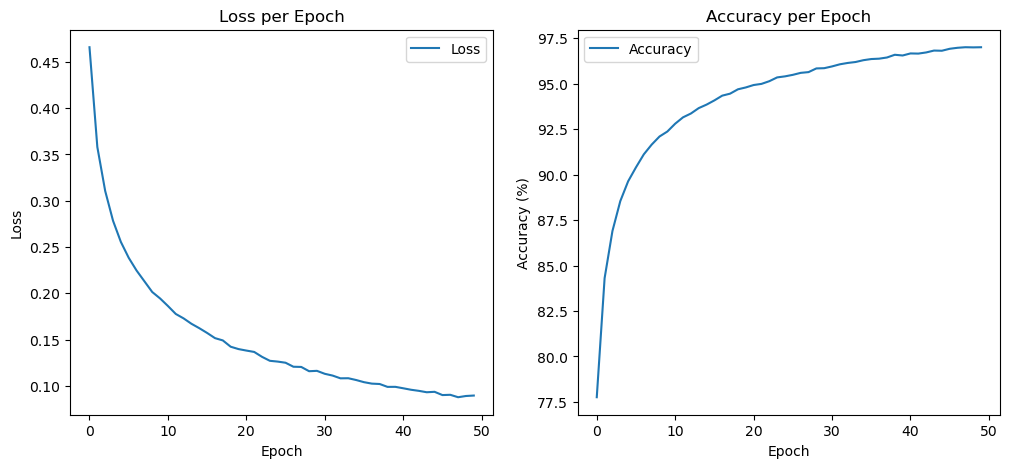

In [19]:
# Tracé des graphiques de perte et de précision
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(losses, label='Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()


In [20]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Assumons que votre modèle et vos DataLoader sont déjà définis et importés ici.

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleMLP(input_size=dataset[0][0].shape[0]).to(device)
model.train()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Pour sauvegarder les poids et tracer les graphiques
losses = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

num_epochs = 100
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())
    
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total
    epoch_precision = precision_score(all_labels, all_predictions, average='binary')
    epoch_recall = recall_score(all_labels, all_predictions, average='binary')
    epoch_f1 = f1_score(all_labels, all_predictions, average='binary')

    losses.append(epoch_loss)
    accuracies.append(epoch_acc)
    precisions.append(epoch_precision)
    recalls.append(epoch_recall)
    f1_scores.append(epoch_f1)

    print(f'Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%, Precision: {epoch_precision:.2f}, Recall: {epoch_recall:.2f}, F1 Score: {epoch_f1:.2f}')

# Sauvegarde des poids du modèle
torch.save(model.state_dict(), '/home/pepuere/Téléchargements/Celeb_face_only_Frames-02/model_weights-01.pth')


Epoch 1, Loss: 0.4664, Accuracy: 77.76%, Precision: 0.79, Recall: 0.77, F1 Score: 0.78
Epoch 2, Loss: 0.3596, Accuracy: 84.22%, Precision: 0.85, Recall: 0.84, F1 Score: 0.84
Epoch 3, Loss: 0.3100, Accuracy: 86.84%, Precision: 0.87, Recall: 0.86, F1 Score: 0.87
Epoch 4, Loss: 0.2787, Accuracy: 88.49%, Precision: 0.89, Recall: 0.88, F1 Score: 0.89
Epoch 5, Loss: 0.2554, Accuracy: 89.61%, Precision: 0.90, Recall: 0.89, F1 Score: 0.90
Epoch 6, Loss: 0.2364, Accuracy: 90.54%, Precision: 0.91, Recall: 0.90, F1 Score: 0.91
Epoch 7, Loss: 0.2218, Accuracy: 91.22%, Precision: 0.92, Recall: 0.91, F1 Score: 0.91
Epoch 8, Loss: 0.2097, Accuracy: 91.75%, Precision: 0.92, Recall: 0.92, F1 Score: 0.92
Epoch 9, Loss: 0.1997, Accuracy: 92.23%, Precision: 0.92, Recall: 0.92, F1 Score: 0.92
Epoch 10, Loss: 0.1908, Accuracy: 92.56%, Precision: 0.93, Recall: 0.92, F1 Score: 0.93
Epoch 11, Loss: 0.1824, Accuracy: 92.96%, Precision: 0.93, Recall: 0.93, F1 Score: 0.93
Epoch 12, Loss: 0.1766, Accuracy: 93.30%,

    Epoch      Loss   Accuracy  Precision    Recall  F1 Score
0       1  0.466378  77.756400   0.785013  0.768218  0.776525
1       2  0.359605  84.215666   0.847503  0.836803  0.842119
2       3  0.310046  86.840602   0.872553  0.864712  0.868615
3       4  0.278720  88.494116   0.888528  0.881923  0.885213
4       5  0.255363  89.613818   0.899579  0.893254  0.896405
..    ...       ...        ...        ...       ...       ...
95     96  0.062177  98.188802   0.982040  0.981955  0.981997
96     97  0.064657  98.133829   0.981618  0.981279  0.981448
97     98  0.061903  98.194588   0.982153  0.981955  0.982054
98     99  0.061283  98.221351   0.982356  0.982286  0.982321
99    100  0.062166  98.223521   0.982454  0.982228  0.982341

[100 rows x 6 columns]


SyntaxError: keyword argument repeated: marker (3080913078.py, line 27)

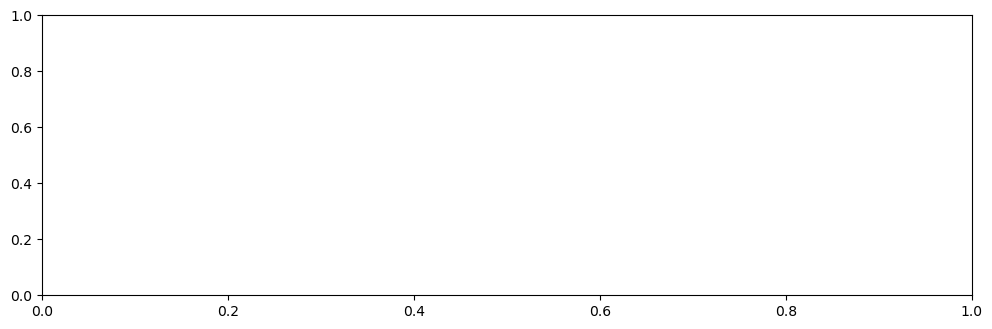

In [21]:

import pandas as pd
import matplotlib.pyplot as plt

# Assumons que les listes losses, accuracies, precisions, recalls, et f1_scores sont remplies pendant l'entraînement

# Création d'un DataFrame pour les métriques
metrics_df = pd.DataFrame({
    'Epoch': range(1, num_epochs + 1),
    'Loss': losses,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Affichage du tableau des métriques
print(metrics_df)

# Sauvegarde du tableau des métriques dans un fichier CSV
metrics_df.to_csv('/home/pepuere/Téléchargements/Celeb_face_only_Frames-02/metrics_summary.csv', index=False)

# Tracé des graphiques
plt.figure(figsize=(12, 8))

# Graphique de la perte
plt.subplot(2, 1, 1)
plt.plot(metrics_df['Epoch'], metrics_df['Loss'], marker='o', color='red', marker='o', color='blue')
plt.title('Loss Evolution Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# Graphique de la précision
plt.subplot(2, 1, 2)
plt.plot(metrics_df['Epoch'], metrics_df['Accuracy'], marker='o', color='blue')
plt.title('Accuracy Evolution Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

# Afficher les graphiques
plt.tight_layout()
plt.show()


    Epoch      Loss   Accuracy  Precision    Recall  F1 Score
0       1  0.462871  77.862005   0.786476  0.769772  0.778034
1       2  0.359735  84.227239   0.847696  0.837550  0.842592
2       3  0.311779  86.741506   0.871881  0.863898  0.867871
3       4  0.281023  88.358855   0.887008  0.881305  0.884147
4       5  0.255899  89.528466   0.899291  0.892154  0.895709
5       6  0.239165  90.383433   0.906946  0.901726  0.904328
6       7  0.223679  91.075652   0.913930  0.908500  0.911207
7       8  0.212510  91.594998   0.918895  0.913910  0.916396
8       9  0.200422  92.193185   0.924206  0.920612  0.922406
9      10  0.192873  92.517233   0.927569  0.923669  0.925615
10     11  0.184703  92.872384   0.930964  0.927357  0.929157
11     12  0.177691  93.156650   0.933951  0.929997  0.931970
12     13  0.170988  93.441639   0.936677  0.932954  0.934812
13     14  0.164620  93.706375   0.938429  0.936584  0.937506
14     15  0.159562  93.928435   0.940871  0.938522  0.939695
15     1

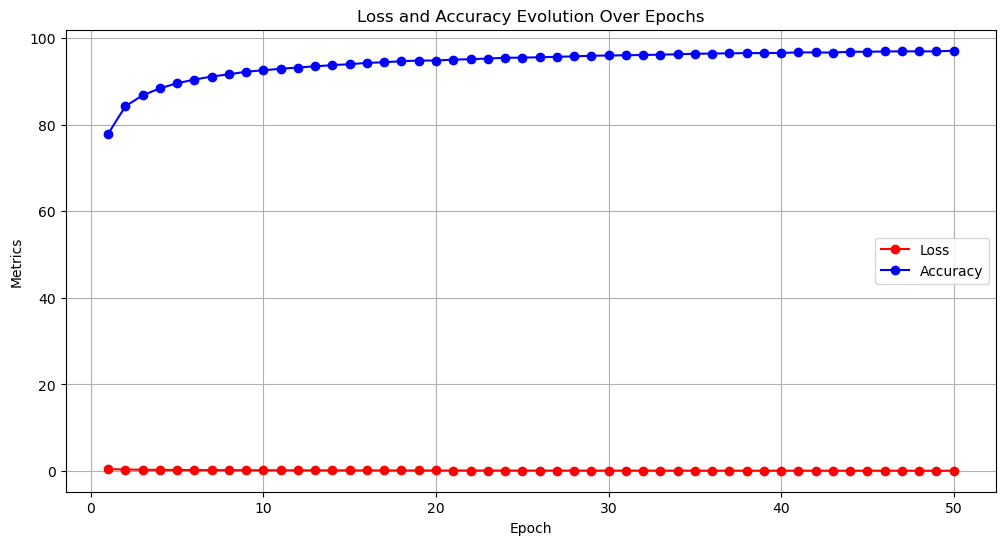

In [10]:

import pandas as pd
import matplotlib.pyplot as plt

# Assumons que les listes losses, accuracies, precisions, recalls, et f1_scores sont remplies pendant l'entraînement

# Création d'un DataFrame pour les métriques
metrics_df = pd.DataFrame({
    'Epoch': range(1, num_epochs + 1),
    'Loss': losses,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Affichage du tableau des métriques
print(metrics_df)

# Sauvegarde du tableau des métriques dans un fichier CSV
metrics_df.to_csv('/home/pepuere/Téléchargements/Celeb_face_only_Frames-02/metrics_summary.csv', index=False)

# Tracé des graphiques combinés
plt.figure(figsize=(12, 6))
plt.plot(metrics_df['Epoch'], metrics_df['Loss'], label='Loss', marker='o', color='red')
plt.plot(metrics_df['Epoch'], metrics_df['Accuracy'], label='Accuracy', marker='o', color='blue')
plt.title('Loss and Accuracy Evolution Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)
plt.show()
